<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/DeepLearningRNN/blob/main/SeriesTemporaisLSTMBolsadeValores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas
from keras.models import Sequential
from keras.layers import Dense
import math
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saulohenriaguiar","key":"f39a97212cfdbde2b816fdffcb292e24"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d benjibb/sp500-since-1950

  0% 0.00/277k [00:00<?, ?B/s]
100% 277k/277k [00:00<00:00, 18.3MB/s]


In [8]:
!unzip sp500-since-1950.zip

Archive:  sp500-since-1950.zip
  inflating: GSPC.csv                


In [9]:
dados = pd.read_csv('/content/GSPC.csv')

In [10]:
dados.shape

(17218, 7)

In [11]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


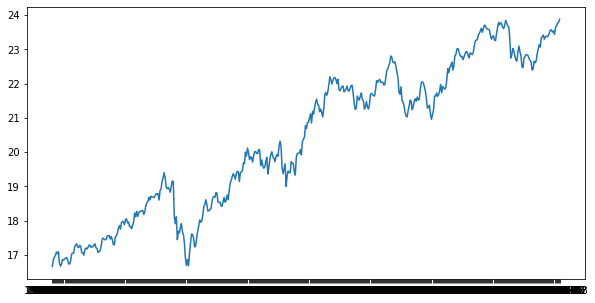

In [12]:
# Mostrando o gráfico no período dos 3 primeiros anos (1950-1952)
x = dados['Date'][0:500]
y = dados['Close'][0:500]
plt.figure(figsize=(10, 5))
plt.plot(x,y)

In [13]:
# Criando um dataset com os dados x e y
dataset = pd.concat([x, y], axis=1)
dataset.columns =['x','y']

In [14]:
tamanho_treino = int(len(dataset) * 0.70)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]

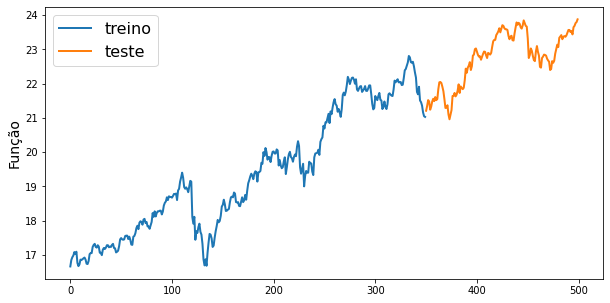

In [15]:
# Mostrando quais dados servirão para treino e para teste
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(treino['y'], label='treino', linewidth=2)
ax.plot(teste['y'], label='teste', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

In [16]:
# Criando a função para agrupar os dados em windows
def gera_dataset(dataset, tamanho_janela = 1):
    dataA, dataB = [], []
    for i in range(len(dataset)-tamanho_janela): 
        a = dataset.loc[(dataset.index[0]+i):(dataset.index[0]+i+tamanho_janela-1)]['y'].values
        dataA.append(a)
        dataB.append(dataset.loc[[dataset.index[0]+i+tamanho_janela]]['y'].values)
    return np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

In [17]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

In [18]:
x_treino.shape

(340, 10)

In [19]:
# Criando o modelo MLP com nº neurônios de entrada==tamanho_janela, 1 camada oculta de 8 neurônios e uma camada de saída:
modelo = Sequential()

# Camada de entrada + camada oculta
modelo.add(Dense(8, input_dim = tamanho_janela, activation = 'relu'))

# Camada de saída
modelo.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compilação
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')
modelo.fit(x_treino, y_treino, epochs = 100, batch_size = 10, verbose = 2) 

Epoch 1/100
34/34 - 1s - loss: 237.4617 - 721ms/epoch - 21ms/step
Epoch 2/100
34/34 - 0s - loss: 141.3145 - 34ms/epoch - 998us/step
Epoch 3/100
34/34 - 0s - loss: 59.4140 - 35ms/epoch - 1ms/step
Epoch 4/100
34/34 - 0s - loss: 13.4554 - 44ms/epoch - 1ms/step
Epoch 5/100
34/34 - 0s - loss: 1.2067 - 35ms/epoch - 1ms/step
Epoch 6/100
34/34 - 0s - loss: 0.1216 - 41ms/epoch - 1ms/step
Epoch 7/100
34/34 - 0s - loss: 0.1102 - 46ms/epoch - 1ms/step
Epoch 8/100
34/34 - 0s - loss: 0.1106 - 38ms/epoch - 1ms/step
Epoch 9/100
34/34 - 0s - loss: 0.1096 - 37ms/epoch - 1ms/step
Epoch 10/100
34/34 - 0s - loss: 0.1097 - 39ms/epoch - 1ms/step
Epoch 11/100
34/34 - 0s - loss: 0.1099 - 41ms/epoch - 1ms/step
Epoch 12/100
34/34 - 0s - loss: 0.1098 - 40ms/epoch - 1ms/step
Epoch 13/100
34/34 - 0s - loss: 0.1098 - 39ms/epoch - 1ms/step
Epoch 14/100
34/34 - 0s - loss: 0.1098 - 40ms/epoch - 1ms/step
Epoch 15/100
34/34 - 0s - loss: 0.1104 - 37ms/epoch - 1ms/step
Epoch 16/100
34/34 - 0s - loss: 0.1103 - 39ms/epoch - 

In [20]:
# Estimando a performance do modelo
score_treino = modelo.evaluate(x_treino, y_treino, verbose = 0)
print('Score em Treino: %.2f MSE (%.2f RMSE)' % (score_treino, math.sqrt(score_treino)))
score_teste = modelo.evaluate(x_teste, y_teste, verbose = 0)
print('Score em Teste: %.2f MSE (%.2f RMSE)' % (score_teste, math.sqrt(score_teste)))

Score em Treino: 0.11 MSE (0.33 RMSE)
Score em Teste: 0.09 MSE (0.30 RMSE)


In [21]:
# Gerando previsões para mostrar no gráfico
previsoes = modelo.predict(x_teste)

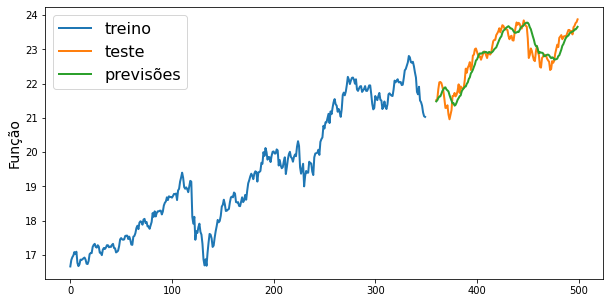

In [22]:
# Plotando os valores previstos pelo modelo juntamente com os valores reais:
# Vamos criar um dataset de mesmo tamanho do teste, inciando em tamanho_janela: teste[tamanho_janela:], pois é assim que y_teste foi 
# criado. Iremos usar teste[tamanho_janela:] em vez de y_teste como referência por causa dos índices, pois queremos plotar no gráfico
# nas posições certas.
previsto = teste[tamanho_janela:].copy() 
previsto['y'] = previsoes # coloca os valores das previsoes do modelo dentro dessa variável
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(treino['y'], label='treino', linewidth=2)
ax.plot(teste['y'][10:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)
# Obs: fica um gap pq começa de 10 unidades pra frente!

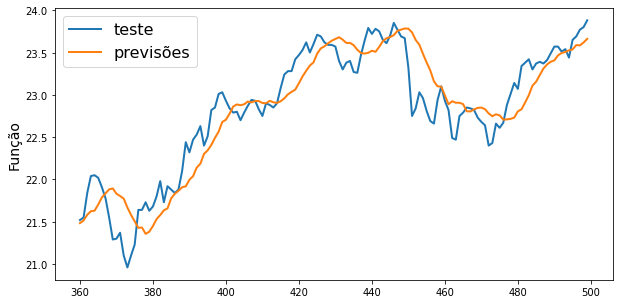

In [23]:
# Olhando mais de perto:
previsto = teste[tamanho_janela:].copy()  
previsto['y'] = previsoes 
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(teste['y'][10:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

In [24]:
# Utilizando LSTM:

from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset['y'] = scaler.fit_transform(dataset['y'].values.reshape(-1,1))
tamanho_treino = int(len(dataset) * 0.7)
treino, teste = dataset[0:tamanho_treino], dataset[tamanho_treino:len(dataset)]

In [25]:
# Aplicando a função nos datasets de treino e teste que já criamos:
tamanho_janela=10
x_treino, y_treino = gera_dataset(treino, tamanho_janela=tamanho_janela)
x_teste, y_teste = gera_dataset(teste, tamanho_janela=tamanho_janela)

# Reshape do input (colocando os dados temporais como features):
x_treino = np.reshape(x_treino, (x_treino.shape[0], x_treino.shape[1], 1)) # pega o dataset x_treino e coloca no formato:
# [n_amostras, n_timesteps, n_features]. O resultado dessa operação será os dados do dataset x_treino com essas 3 dimensões.
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [26]:
print(x_treino.shape)
print(x_teste.shape)

(340, 10, 1)
(140, 10, 1)


In [27]:
# Criando o modelo LSTM:
modelo = Sequential()
modelo.add(LSTM(4, batch_input_shape = (2, x_treino.shape[1], x_treino.shape[2]), stateful = True))


modelo.add(Dense(1)) # Saída da LSTM
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')
modelo.fit(x_treino, y_treino, epochs = 100, batch_size = 2, verbose = 2)

Epoch 1/100
170/170 - 2s - loss: 0.1207 - 2s/epoch - 11ms/step
Epoch 2/100
170/170 - 0s - loss: 0.0436 - 448ms/epoch - 3ms/step
Epoch 3/100
170/170 - 0s - loss: 0.0143 - 450ms/epoch - 3ms/step
Epoch 4/100
170/170 - 0s - loss: 0.0055 - 450ms/epoch - 3ms/step
Epoch 5/100
170/170 - 0s - loss: 0.0030 - 484ms/epoch - 3ms/step
Epoch 6/100
170/170 - 0s - loss: 0.0024 - 448ms/epoch - 3ms/step
Epoch 7/100
170/170 - 0s - loss: 0.0020 - 472ms/epoch - 3ms/step
Epoch 8/100
170/170 - 0s - loss: 0.0017 - 446ms/epoch - 3ms/step
Epoch 9/100
170/170 - 0s - loss: 0.0019 - 493ms/epoch - 3ms/step
Epoch 10/100
170/170 - 0s - loss: 0.0018 - 439ms/epoch - 3ms/step
Epoch 11/100
170/170 - 0s - loss: 0.0016 - 441ms/epoch - 3ms/step
Epoch 12/100
170/170 - 0s - loss: 0.0016 - 453ms/epoch - 3ms/step
Epoch 13/100
170/170 - 0s - loss: 0.0016 - 448ms/epoch - 3ms/step
Epoch 14/100
170/170 - 0s - loss: 0.0016 - 474ms/epoch - 3ms/step
Epoch 15/100
170/170 - 0s - loss: 0.0015 - 467ms/epoch - 3ms/step
Epoch 16/100
170/170 

In [28]:
from sklearn.metrics import mean_squared_error

# Previsões
previsoes_treino = modelo.predict(x_treino, batch_size=2)
previsoes_teste = modelo.predict(x_teste, batch_size=2)

# Inverte as previsões por conta da normalização
previsoes_treino = scaler.inverse_transform(previsoes_treino.reshape(-1,1))
y_treino = scaler.inverse_transform(y_treino.reshape(-1,1))
previsoes_teste = scaler.inverse_transform(previsoes_teste.reshape(-1,1))
y_teste = scaler.inverse_transform(y_teste.reshape(-1,1))

# Calcula o RMSE
score_treino = math.sqrt(mean_squared_error(y_treino, previsoes_treino))
print('Score em Treino: %.2f RMSE' % (score_treino))  
score_teste = math.sqrt(mean_squared_error(y_teste, previsoes_teste))
print('Score em Teste: %.2f RMSE' % (score_teste))

Score em Treino: 0.19 RMSE
Score em Teste: 0.20 RMSE


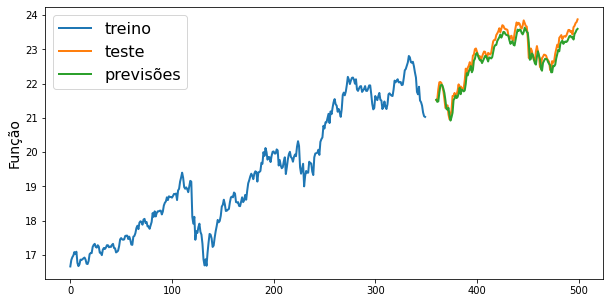

In [29]:
# Mostrando as previsões do modelo:
previsto = teste[tamanho_janela:].copy()  
previsto['y'] = previsoes_teste # coloca os valores das previsoes do modelo dentro dessa variável
fig, ax = plt.subplots(1, figsize=(10, 5))
treino['y'] = scaler.inverse_transform(treino['y'].values.reshape(-1,1))
teste['y'] = scaler.inverse_transform(teste['y'].values.reshape(-1,1))
ax.plot(treino['y'], label='treino', linewidth=2)
ax.plot(teste['y'][tamanho_janela:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)

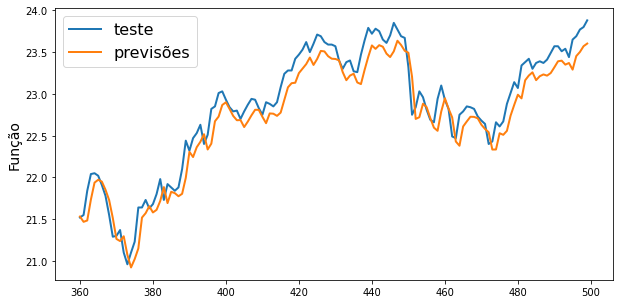

In [30]:
# Olhando mais de perto:

fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(teste['y'][tamanho_janela:], label='teste', linewidth=2)
ax.plot(previsto['y'], label='previsões', linewidth=2)
ax.set_ylabel('Função', fontsize=14)
ax.legend(loc='best', fontsize=16)